In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
from dotmap import DotMap

from verifai.samplers.scenic_sampler import ScenicSampler
from verifai.scenic_server import ScenicServer
from verifai.falsifier import generic_falsifier, generic_parallel_falsifier
from verifai.monitor import multi_objective_monitor, specification_monitor
from verifai.falsifier import generic_falsifier
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

/Users/kesav/Documents/Carla/Scenic-devel/src/scenic/core/errors.py:157: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn('unable to install sys.excepthook to format Scenic backtraces')


In [2]:
# The specification must assume multi_objective_monitor class
class confidence_spec(specification_monitor):
    def __init__(self):
        def specification(traj):
            min_dist = np.inf
            for i, val in enumerate(traj):
                obj1, obj2 = val
                min_dist = min(min_dist, obj1.distanceTo(obj2))
            # print(min_dist)
            return min_dist - 5
        
        super().__init__(specification)

In [5]:
def test_driving_dynamic():

    path = 'scenic_driving.scenic'
    sampler = ScenicSampler.fromScenario(path)
    falsifier_params = DotMap(
        n_iters=1000,
        save_error_table=True,
        save_safe_table=True,
    )
    server_options = DotMap(maxSteps=2, verbosity=0)
    monitor = confidence_spec()
    
    falsifier = generic_falsifier(sampler=sampler,
                                  falsifier_params=falsifier_params,
                                  server_class=ScenicServer,
                                  server_options=server_options,
                                  monitor=monitor)
    t0 = time.time()
    falsifier.run_falsifier()
    t = time.time() - t0
    print(f'Generated {len(falsifier.samples)} samples in {t} seconds with 1 worker')
    print(f'Number of counterexamples: {len(falsifier.error_table.table)}')
    return falsifier

In [20]:
falsifier = test_driving_dynamic()

sampler type is mab
Creating multi-armed bandit sampler
Initializing server
Running falsifier; server class is <class 'verifai.scenic_server.ScenicServer'>


[1 2]; [0 3]; [4 0]; [2 4]; [3 1]; [0 2]; [1 3]; [4 0]; [3 4]; [2 1]; [0 4]; [1 1]; [3 3]; [4 2]; [2 0]; [0 0]; [4 3]; [2 4]; [1 2]; [3 1]; [3 1]; [4 0]; [2 3]; [1 4]; [0 2]; [2 2]; [4 4]; [3 0]; [1 1]; [0 3]; [0 2]; [3 0]; [2 1]; [1 4]; [4 3]; [0 1]; [1 2]; [3 0]; [2 3]; [4 4]; [0 1]; [2 0]; [3 3]; [1 2]; [4 4]; [3 4]; [2 3]; [0 0]; [1 1]; [4 2]; [0 2]; [1 1]; [3 4]; [2 3]; [4 0]; [2 1]; [3 4]; [4 0]; [0 3]; [1 2]; [4 2]; [2 4]; [0 0]; [1 3]; [3 1]; [0 4]; [1 2]; [3 3]; [4 1]; [2 0]; [2 1]; [0 4]; [4 0]; [3 3]; [1 2]; [3 2]; [2 1]; [4 3]; [0 4]; [1 0]; [1 0]; [4 2]; [3 4]; [0 3]; [2 1]; [4 3]; [2 2]; [0 1]; [1 4]; [3 0]; [2 3]; [0 2]; [4 1]; [3 4]; [1 0]; [4 2]; [2 0]; [3 3]; [1 4]; [0 1]; [4 3]; [4 3]; [4 3]; [2 4]; [1 2]; [3 0]; [0 1]; [4 3]; [1 0]; [2 2]; [3 1]; [0 4]; [4 3]; [4 3]; [2 2]; [3 1]; [1 4]; [0 0]; [4 3]; [2 1]; [3 4]; [0 2]; [1 0]; [4 3]; [0 0]; [3 1]; [1 4]; [2 2]; [4 3]; [0 0]; [3 2]; [2 1]; [1 4]; [4 3]; [2 4]; [3 1]; [0 0]; [1 2]; [4 3]; [0 1]; [1 4]; [3 0]; [2 2];

[4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [3 4]; [2 2]; [0 1]; [1 0]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [3 0]; [0 2]; [1 1]; [2 4]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [1 4]; [0 2]; [3 1]; [2 0]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [3 4]; [0 2]; [2 0]; [1 1]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3];

[4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [0 4]; [2 0]; [3 1]; [1 2]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [2 1]; [1 2]; [0 0]; [3 4]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [2 0]; [1 2]; [3 1]; [0 4]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [1 4]; [3 1]; [0 0]; [2 2]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [3 0]; [1 2]; [0 4]; [2 1]; [4 3]; [4 3];

[4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [1 2]; [3 4]; [2 1]; [0 0]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [3 2]; [2 0]; [0 1]; [1 4]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [3 2]; [1 1]; [2 0]; [0 4]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [1 4]; [3 1]; [0 0]; [2 2]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [1 1]; [3 0]; [0 2]; [2 4]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [0 4]; [1 0]; [2 2]; [3 1]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [1 4]; [3 1]; [2 2]; [0 0]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3]; [4 3];

In [21]:
falsifier.error_table.table

,point.objects.object0.color[0],point.objects.object0.color[1],point.objects.object0.color[2],point.objects.object0.heading,point.objects.object0.position[0],point.objects.object0.position[1],point.objects.object0.velocity[0],point.objects.object0.velocity[1],point.objects.object1.color[0],point.objects.object1.color[1],point.objects.object1.color[2],point.objects.object1.heading,point.objects.object1.position[0],point.objects.object1.position[1],point.objects.object1.velocity[0],point.objects.object1.velocity[1],rho
0,0.353234,0.352973,0.583434,1.928930,4.964561,2.0,-0.0,0.0,0.923638,0.906759,0.902652,2.270956,2.765663,-2.0,-0.0,0.0,-0.435446
1,0.682900,0.682900,0.682900,1.966933,4.422990,2.0,-0.0,0.0,0.817661,0.719214,0.719214,2.270956,2.541581,-2.0,-0.0,0.0,-0.579627
2,0.922450,0.922450,0.922450,1.928930,4.959804,2.0,-0.0,0.0,0.820995,0.751882,0.751882,2.270956,2.715740,-2.0,-0.0,0.0,-0.413517
3,0.732440,0.196049,0.196049,1.966933,4.404520,2.0,-0.0,0.0,0.925760,0.925760,0.925760,2.232953,2.940518,-2.0,-0.0,0.0,-0.740505
4,0.786657,0.284756,0.284756,1.966933,4.393986,2.0,-0.0,0.0,0.765546,0.379092,0.379092,2.270956,2.786797,-2.0,-0.0,0.0,-0.689193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.335725,0.325225,0.322649,1.928930,4.654030,2.0,-0.0,0.0,0.568120,0.565618,0.499706,2.294835,2.396361,-2.0,-0.0,0.0,-0.406845
655,0.795377,0.788328,0.573607,1.928930,4.603007,2.0,-0.0,0.0,0.291555,0.291555,0.291555,2.315494,1.999413,-2.0,-0.0,0.0,-0.227296
656,0.808703,0.210411,0.210411,1.928930,4.604062,2.0,-0.0,0.0,0.227612,0.201811,0.199735,2.315494,2.302402,-2.0,-0.0,0.0,-0.385063
657,0.501948,0.501948,0.501948,1.928930,4.778584,2.0,-0.0,0.0,0.316316,0.509267,0.147462,2.270956,2.447845,-2.0,-0.0,0.0,-0.370492


In [22]:
df = pd.concat([falsifier.safe_table.table, falsifier.error_table.table])

In [23]:
df

,point.objects.object0.color[0],point.objects.object0.color[1],point.objects.object0.color[2],point.objects.object0.heading,point.objects.object0.position[0],point.objects.object0.position[1],point.objects.object0.velocity[0],point.objects.object0.velocity[1],point.objects.object1.color[0],point.objects.object1.color[1],point.objects.object1.color[2],point.objects.object1.heading,point.objects.object1.position[0],point.objects.object1.position[1],point.objects.object1.velocity[0],point.objects.object1.velocity[1],rho
0,0.799893,0.799893,0.799893,1.928930,4.616964,2.0,-0.0,0.0,0.912718,0.907953,0.907953,2.400384,0.796270,-2.0,-0.0,0.0,0.531519
1,0.667430,0.768385,0.511062,1.928930,4.979512,2.0,-0.0,0.0,0.839773,0.824213,0.629516,2.400384,1.093729,-2.0,-0.0,0.0,0.576676
2,0.200821,0.588945,0.680329,1.928930,4.947900,2.0,-0.0,0.0,0.698407,0.698407,0.698407,2.400384,1.094868,-2.0,-0.0,0.0,0.553905
3,0.150110,0.149487,0.142571,1.928930,4.834672,2.0,-0.0,0.0,1.000000,1.000000,1.000000,2.355751,1.602823,-2.0,-0.0,0.0,0.142455
4,0.972017,0.968989,0.968989,1.928930,4.812379,2.0,-0.0,0.0,0.896699,0.896699,0.896699,2.355751,1.571912,-2.0,-0.0,0.0,0.147876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.335725,0.325225,0.322649,1.928930,4.654030,2.0,-0.0,0.0,0.568120,0.565618,0.499706,2.294835,2.396361,-2.0,-0.0,0.0,-0.406845
655,0.795377,0.788328,0.573607,1.928930,4.603007,2.0,-0.0,0.0,0.291555,0.291555,0.291555,2.315494,1.999413,-2.0,-0.0,0.0,-0.227296
656,0.808703,0.210411,0.210411,1.928930,4.604062,2.0,-0.0,0.0,0.227612,0.201811,0.199735,2.315494,2.302402,-2.0,-0.0,0.0,-0.385063
657,0.501948,0.501948,0.501948,1.928930,4.778584,2.0,-0.0,0.0,0.316316,0.509267,0.147462,2.270956,2.447845,-2.0,-0.0,0.0,-0.370492


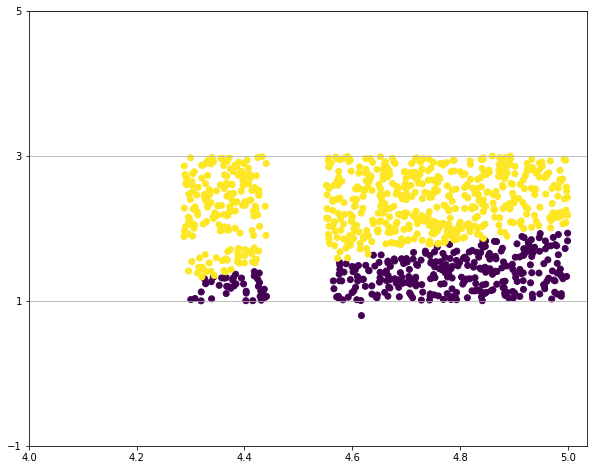

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(df['point.objects.object0.position[0]'], df['point.objects.object1.position[0]'], c=df['rho'] < 0);
plt.xticks(np.linspace(4, 5, 6));
plt.yticks(np.linspace(-1, 5, 4));
plt.grid(axis='y');